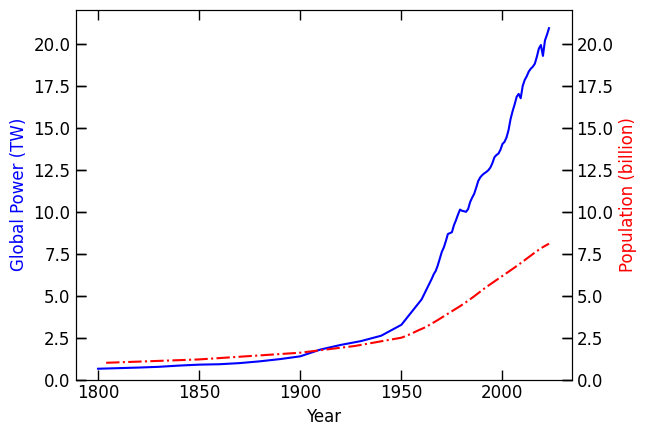

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
#energy data source https://ourworldindata.org/energy-production-consumption
# population data source https://www.worldometers.info/world-population/world-population-by-year/
data = pd.read_csv("global-energy-substitution.csv")

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.tick_params(which='both', width=1)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=3, color='k')
ax2.tick_params(which='both', width=1)
ax2.tick_params(which='major', length=7)
ax2.tick_params(which='minor', length=3, color='k')
ax1.tick_params(axis='x', direction='in', top=True, bottom=True) #For x-axis
ax1.tick_params(axis='y', direction='in', left=True, right=True) #For y-axis
ax2.tick_params(axis='x', direction='in', top=True, bottom=True) #For x-axis
ax2.tick_params(axis='y', direction='in', left=True, right=True) #For y-axis
#ax1.xaxis.set_minor_locator(MultipleLocator(5))
#ax1.yaxis.set_minor_locator(AutoMinorLocator())
#ax1.minorticks_on()

# Plot data on the first y-axis
ax1.plot(data['Year'], data['Total (TWh)']/8760, '-b', label='Energy')
ax1.set_ylabel('Global Power (TW)')
ax1.yaxis.label.set_color('blue')
ax1.set_xlabel('Year')
ax1.set_ylim(0, 22)

# Plot data on the second y-axis
ax2.plot(data['pop year'], data['population']/1e9, '-.r', label='Population')
ax2.set_ylabel('Population (billion)')
ax2.set_ylim(0, 22)
ax2.yaxis.label.set_color('red')

plt.rcParams.update({'font.size': 12}) 
plt.savefig('powerpop.svg')
plt.show()

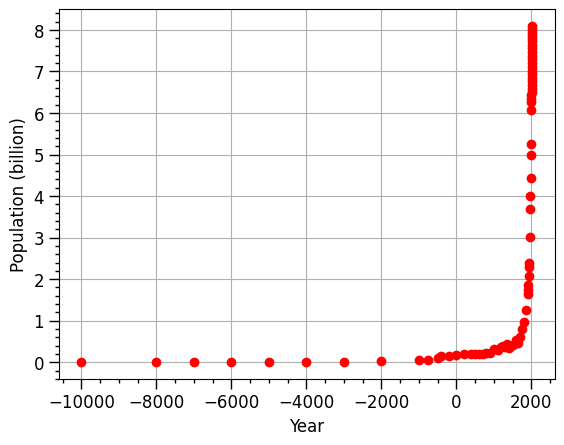

In [81]:
# Earlier population data (pre-1800) source https://en.wikipedia.org/wiki/World_population#Past_population
pop = pd.read_csv("globalpopalltime.csv")
# Plot data on linear scale
plt.plot(pop['year'], pop['world pop (millions)']/1000, 'or', label='Population')
plt.ylabel('Population (billion)')
plt.xlabel('Year')
plt.grid(True)
plt.minorticks_on()
plt.tick_params(which='both', width=1)
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=3, color='k')
#plt.tick_params(axis='x', top=True, bottom=True) #For x-axis
#plt.tick_params(axis='y', left=True, right=True) #For y-axis
plt.savefig('poplinear.svg')
plt.show()

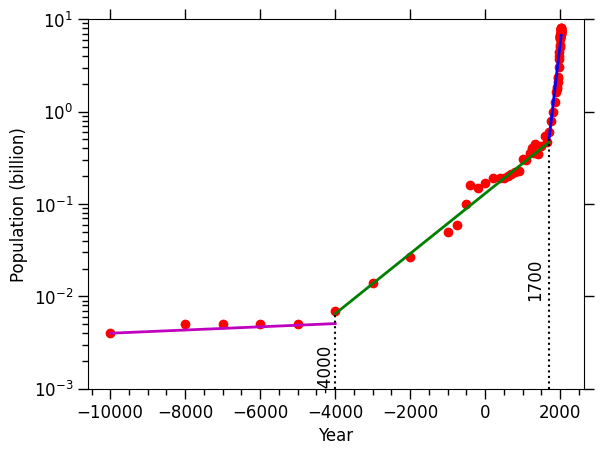

In [142]:
earlyt = np.linspace(-10000, -4000, 1000)
earlyp = 0.004*np.exp(np.log(1.00004)*(earlyt+10000))
midt = np.linspace(-4000, 1700, 1000)
midp = 0.0065*np.exp(np.log(1.00075)*(midt+4000))
latet = np.linspace(1700, 2025, 1000)
latep = 0.5*np.exp(np.log(1.008)*(latet-1700))
# Plot data on log scale
fig, ax = plt.subplots()
ax.tick_params(axis='x', top=True, bottom=True) #For x-axis
ax.tick_params(axis='y', left=True, right=True) #For y-axis
ax.semilogy(pop['year'], pop['world pop (millions)']/1000, 'or', label='Population')
ax.semilogy(earlyt, earlyp, '-m', linewidth=2)
ax.semilogy(midt, midp, '-g', linewidth=2)
ax.semilogy(latet, latep, '-b', linewidth=2)
ax.set_ylabel('Population (billion)')
ax.set_xlabel('Year')
#plt.grid(True)
plt.minorticks_on()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='k')
ax.vlines(-4000, 1e-3, 0.0065, colors='black', linestyles='dotted', label='-4000')
ax.annotate('-4000', xy=(-4000, 0.01), xytext=(-4500, 0.001), xycoords='data', rotation=90)
ax.vlines(1700, 1e-3, 0.5, colors='black', linestyles='dotted', label='1700')
ax.annotate('1700', xy=(1700, 0.2), xytext=(1100, 0.01), xycoords='data', rotation=90)
ax.set_ylim(1e-3, 1e1)
plt.savefig('poplog3era.svg')
plt.show()

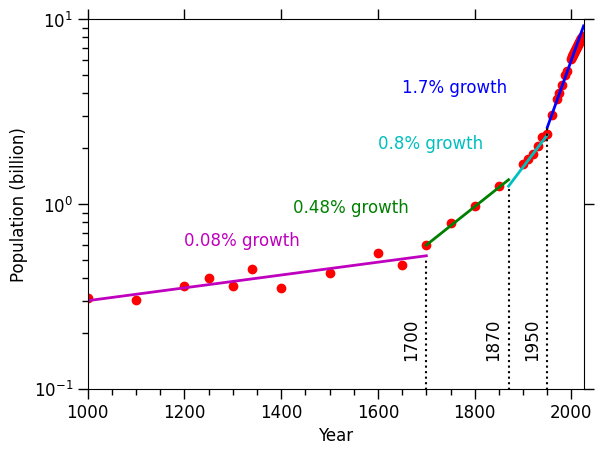

In [84]:
earlyt = np.linspace(1000, 1700, 1000)
earlyp = 0.3*np.exp(np.log(1.0008)*(earlyt-1000))
midt = np.linspace(1700, 1870, 1000)
midp = 0.6*np.exp(np.log(1.0048)*(midt-1700))
latet = np.linspace(1870, 1950, 1000)
latep = 1.25*np.exp(np.log(1.008)*(latet-1870))
nowt = np.linspace(1950, 2025, 1000)
nowp = 2.6*np.exp(np.log(1.017)*(nowt-1950))
# Plot data on log scale
fig, ax = plt.subplots()
ax.tick_params(axis='x', top=True, bottom=True) #For x-axis
ax.tick_params(axis='y', left=True, right=True) #For y-axis
ax.semilogy(pop['year'], pop['world pop (millions)']/1000, 'or', label='Population')
ax.semilogy(earlyt, earlyp, '-m', linewidth=2)
ax.semilogy(midt, midp, '-g', linewidth=2)
ax.semilogy(latet, latep, '-c', linewidth=2)
ax.semilogy(nowt, nowp, '-b', linewidth=2)
ax.set_ylabel('Population (billion)')
ax.set_xlabel('Year')
#plt.grid(True)
plt.minorticks_on()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='k')
ax.set_ylim(1e-1, 1e1)
ax.set_xlim(1000, 2025)
ax.vlines(1700, 1e-3, 0.5, colors='black', linestyles='dotted', label='1700')
ax.annotate('1700', xy=(1700, 0.2), xytext=(1650, 0.15), xycoords='data', rotation=90)
ax.annotate('0.08% growth', xy=(1400, 0.2), xytext=(1200, 0.6), xycoords='data',color='m')
ax.vlines(1870, 1e-3, 1.25, colors='black', linestyles='dotted', label='1870')
ax.annotate('1870', xy=(1850, 0.1), xytext=(1820, 0.15), xycoords='data', rotation=90)
ax.annotate('0.48% growth', xy=(1700, 0.2), xytext=(1425, 0.9), xycoords='data',color='green')
ax.vlines(1950, 1e-3, 2.6, colors='black', linestyles='dotted', label='1950')
ax.annotate('1950', xy=(1950, 0.1), xytext=(1900, 0.15), xycoords='data', rotation=90)
ax.annotate('0.8% growth', xy=(1700, 0.2), xytext=(1600, 2), xycoords='data',color='c')
ax.annotate('1.7% growth', xy=(1700, 0.2), xytext=(1650, 4), xycoords='data',color='blue')
plt.savefig('poplog4era.svg')
plt.show()

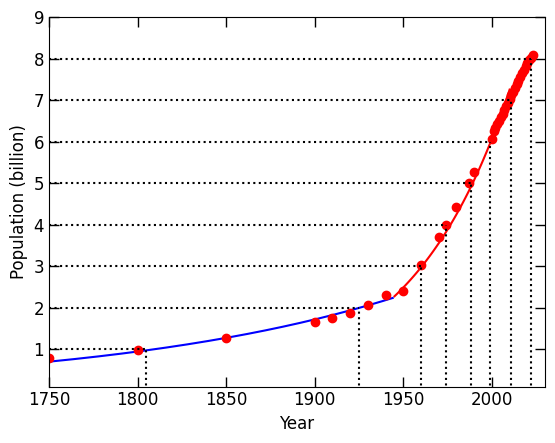

In [145]:
xsmth = np.linspace(1750, 2010, 261)
ysmth = np.zeros(261)
ysmth[0:195] = 0.7*np.exp(np.log(1.006)*(xsmth[0:195]-1750))
ysmth[195:261] = ysmth[194]*np.exp(np.log(1.018)*(xsmth[195:261]-1944))
years = np.array([1750, 1805, 1925, 1960, 1974, 1988, 1999, 2011, 2022])


fig, ax = plt.subplots()
ax.tick_params(axis='x', direction='in', top=True, bottom=True) #For x-axis
ax.tick_params(axis='y', direction='in', left=True, right=True) #For y-axis
ax.plot(xsmth[195:266], ysmth[195:266], '-r')
ax.plot(xsmth[0:195], ysmth[0:195], '-b')
ax.plot(pop['year'], pop['world pop (millions)']/1000, 'or', label='Population')
ax.set_ylabel('Population (billion)')
ax.set_xlabel('Year')
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4, color='k')
ax.set_ylim(0.1, 9)
ax.set_xlim(1750, 2030)

for i in range(len(years)-1):
    ax.hlines(i+1, 1750, years[i+1], linestyles='dotted', colors='black')
    ax.vlines(years[i+1], 0, i+1, colors='black', linestyles='dotted', label='1700')

plt.savefig('popbillionincrease.svg')
plt.show()

# Figure 3.7 and 3.8

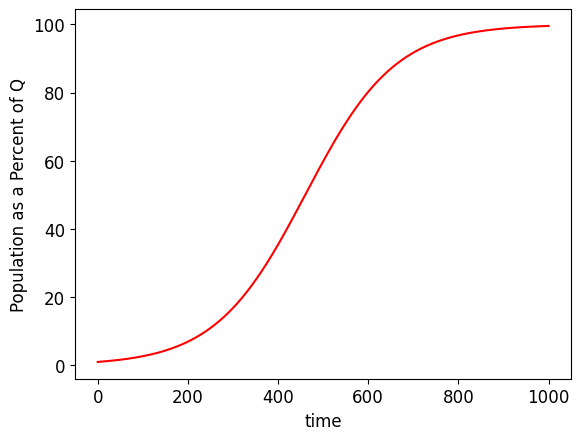

In [158]:
Q = 100
P = 1
r = 0.01
t = np.linspace(0, 1000, 1001)
Pt = np.zeros(1001)
j = 0
for i in t:
    dotP = (Q-P)/Q*r*P
    P += dotP
    Pt[j] = P
    j += 1


plt.plot(t, Pt, '-r')
plt.xlabel('time')
plt.ylabel('Population as a Percent of Q')
plt.show()

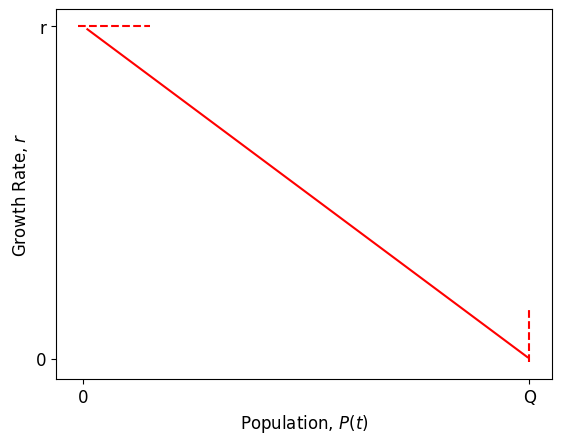

In [178]:
plt.plot(Pt, (Q-Pt)/Q, '-r')
plt.yticks([0,1], [0,'r'])  # Hide x-axis tick labels
plt.xticks([0, 100],[0, 'Q'])  # Hide y-axis tick labels
plt.xlabel(r'Population, $P(t)$')
plt.ylabel(r'Growth Rate, $r$')
plt.hlines(1, -1, 15, colors='red', linestyles='dashed')
plt.vlines(100, -0.01, 0.15, colors='red', linestyles='dashed')
plt.savefig('growthvsPt.svg')
plt.show()